In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [3]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.00,NaN,513,4.0,DPM,NaN,14.93,CuZnAl-3,90.0,0.19,...,NaN,NaN,Al2O3,0.6639,17.4,NaN,1.5625,NaN,54.2,NaN
1,3.03,NaN,513,4.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,59.8,NaN,5.6700,NaN,73.9,NaN
2,3.03,NaN,533,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,58.2,NaN,4.6242,NaN,62.5,NaN
3,3.03,NaN,513,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,49.9,NaN,4.0900,NaN,64.5,NaN
4,3.03,NaN,513,2.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,40.0,NaN,6.7662,NaN,54.1,NaN


# EDA and FEATURE ENGG

In [4]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.67,13.3,31.6,0.2340,0.102,NaN,0.6639,17.4,1.5625,54.2
1,3.03,513,4.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,59.8,5.6700,73.9
2,3.03,533,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,58.2,4.6242,62.5
3,3.03,513,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,49.9,4.0900,64.5
4,3.03,513,2.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,40.0,6.7662,54.1


In [5]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [6]:
#HANDLING NULL VALUES

In [7]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [8]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [9]:
#LABEL ENCODING for Preparation Method

In [10]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

In [11]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.40,1.562500,54.2
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,59.80,5.670000,73.9
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,58.20,4.624200,62.5
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,49.90,4.090000,64.5
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,40.00,6.766200,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.1,16.9,0.0900,0.0000,0.0,0.9100,9.77,3.008875,24.0
364,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.8,16.9,0.0900,0.0415,0.0,0.8685,9.77,18.360000,61.0
365,4.00,573,4.0,9,2.99,84.0,0.38,6.755,9.8,16.9,0.0900,0.0830,0.0,0.8270,9.77,3.008875,42.0
366,4.00,573,4.0,9,2.99,84.0,0.38,6.755,16.8,16.9,0.0900,0.1660,0.0,0.7440,9.77,3.008875,23.0


# CATALYST PROPERTY DATASET

In [12]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,0,1,2,3,0.1,1.1,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,0,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,1,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,2,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,4,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


# FINAL DATASET

In [13]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,...,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


In [14]:
X=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
X.shape


(368, 31)

In [15]:
Y=Data['CO2 Conv']
Y.shape


(368,)

In [16]:
#DATA STANDARDIZATION

In [17]:
scaling=StandardScaler()
X=scaling.fit_transform(X)
X.shape

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(368, 31)

# ANN

In [18]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm


In [19]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(294, 31)
(74, 31)
(294,)
(74,)


In [20]:
#HYPERPARAMETER TUNING

In [21]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mean_squared_error',metrics='mean_squared_error')
    return model

In [26]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3,directory='PROJECT',project_name='CO2 to methanol Conversion')


In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [28]:
tuner.search(X_train, Y_train, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)], validation_data=(X_test, Y_test))


Trial 10 Complete [00h 00m 07s]
val_loss: 8.073163032531738

Best val_loss So Far: 8.073163032531738
Total elapsed time: 00h 01m 53s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.results_summary()

Results summary
Results in PROJECT\CO2 to methanol Conversion
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 192
learning_rate: 0.01
units_2: 192
units_3: 288
units_4: 416
units_5: 224
units_6: 160
units_7: 128
units_8: 64
units_9: 64
units_10: 192
units_11: 160
units_12: 192
units_13: 480
units_14: 384
units_15: 384
units_16: 64
units_17: 480
units_18: 160
Score: 8.073163032531738
Trial summary
Hyperparameters:
num_layers: 19
units_0: 448
units_1: 288
learning_rate: 0.0001
units_2: 416
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 9.088552792867025
Trial summary
Hyperparameters:
num_layers: 6
units_0: 224
units_1: 32
learning_rate: 0.001
units_2: 352
units_3: 128
units_4: 256
units_5: 160
units_6: 448
units_7: 384
units_8: 320
units_9: 288
units_10: 96
units_11: 448
units_12: 352
uni

In [39]:
# ANN 

In [63]:
model = Sequential()


model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(192, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(192, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(96, activation='relu'))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(352, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(160, activation='relu'))
#model.add(Dense(352, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))



In [64]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',metrics=['mae','mse'])

In [65]:
model_history=model.fit(x=X_train, y=Y_train, epochs=500, validation_data=(X_test, Y_test))


Epoch 1/500
10/10 [==============================] - 1s 15ms/step - loss: 165.1128 - mae: 9.7235 - mse: 165.1128 - val_loss: 83.1268 - val_mae: 6.9669 - val_mse: 83.1268
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 60.0790 - mae: 5.0550 - mse: 60.0790 - val_loss: 39.5085 - val_mae: 4.6389 - val_mse: 39.5085
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 24.3241 - mae: 3.5914 - mse: 24.3241 - val_loss: 19.1870 - val_mae: 3.2106 - val_mse: 19.1870
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 12.2566 - mae: 2.4671 - mse: 12.2566 - val_loss: 14.1080 - val_mae: 2.7922 - val_mse: 14.1080
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 9.4079 - mae: 2.1398 - mse: 9.4079 - val_loss: 6.8597 - val_mae: 1.8674 - val_mse: 6.8597
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 5.4210 - mae: 1.5778 - mse: 5.4210 - val_loss: 7.1145 - val_mae: 1.9514 - val_mse: 7.1145
Epo

Epoch 51/500
10/10 [==============================] - 0s 4ms/step - loss: 4.9038 - mae: 1.3418 - mse: 4.9038 - val_loss: 3.2275 - val_mae: 1.3003 - val_mse: 3.2275
Epoch 52/500
10/10 [==============================] - 0s 4ms/step - loss: 3.4655 - mae: 1.1126 - mse: 3.4655 - val_loss: 8.9282 - val_mae: 2.3158 - val_mse: 8.9282
Epoch 53/500
10/10 [==============================] - 0s 4ms/step - loss: 7.6304 - mae: 1.7414 - mse: 7.6304 - val_loss: 9.3348 - val_mae: 2.3814 - val_mse: 9.3348
Epoch 54/500
10/10 [==============================] - 0s 4ms/step - loss: 4.5677 - mae: 1.4719 - mse: 4.5677 - val_loss: 3.4186 - val_mae: 1.3807 - val_mse: 3.4186
Epoch 55/500
10/10 [==============================] - 0s 4ms/step - loss: 4.8032 - mae: 1.2464 - mse: 4.8032 - val_loss: 3.6384 - val_mae: 1.2968 - val_mse: 3.6384
Epoch 56/500
10/10 [==============================] - 0s 4ms/step - loss: 2.0917 - mae: 0.9378 - mse: 2.0917 - val_loss: 4.8950 - val_mae: 1.3208 - val_mse: 4.8950
Epoch 57/500
10/

Epoch 101/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2684 - mae: 0.3455 - mse: 0.2684 - val_loss: 1.4841 - val_mae: 0.7427 - val_mse: 1.4841
Epoch 102/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1413 - mae: 0.2447 - mse: 0.1413 - val_loss: 1.5284 - val_mae: 0.7372 - val_mse: 1.5284
Epoch 103/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0631 - mae: 0.1719 - mse: 0.0631 - val_loss: 1.4987 - val_mae: 0.7578 - val_mse: 1.4987
Epoch 104/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.1439 - mse: 0.0448 - val_loss: 1.4629 - val_mae: 0.7410 - val_mse: 1.4629
Epoch 105/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0311 - mae: 0.1190 - mse: 0.0311 - val_loss: 1.4646 - val_mae: 0.7376 - val_mse: 1.4646
Epoch 106/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0273 - mae: 0.1159 - mse: 0.0273 - val_loss: 1.4711 - val_mae: 0.7286 - val_mse: 1.4711
Epoch 107/

10/10 [==============================] - 0s 4ms/step - loss: 0.2055 - mae: 0.3408 - mse: 0.2055 - val_loss: 1.5430 - val_mae: 0.8538 - val_mse: 1.5430
Epoch 151/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2725 - mae: 0.3686 - mse: 0.2725 - val_loss: 1.2054 - val_mae: 0.7852 - val_mse: 1.2054
Epoch 152/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2274 - mae: 0.3529 - mse: 0.2274 - val_loss: 1.2963 - val_mae: 0.8329 - val_mse: 1.2963
Epoch 153/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2050 - mae: 0.3410 - mse: 0.2050 - val_loss: 1.4759 - val_mae: 0.8825 - val_mse: 1.4759
Epoch 154/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2688 - mae: 0.3740 - mse: 0.2688 - val_loss: 1.4945 - val_mae: 0.8610 - val_mse: 1.4945
Epoch 155/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3929 - mae: 0.4112 - mse: 0.3929 - val_loss: 1.1651 - val_mae: 0.7739 - val_mse: 1.1651
Epoch 156/500
10/10 [===

Epoch 200/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1888 - mae: 0.2807 - mse: 0.1888 - val_loss: 1.3944 - val_mae: 0.8629 - val_mse: 1.3944
Epoch 201/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1041 - mae: 0.2124 - mse: 0.1041 - val_loss: 1.0030 - val_mae: 0.7028 - val_mse: 1.0030
Epoch 202/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1221 - mae: 0.1916 - mse: 0.1221 - val_loss: 1.1087 - val_mae: 0.7291 - val_mse: 1.1087
Epoch 203/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0609 - mae: 0.1706 - mse: 0.0609 - val_loss: 1.2019 - val_mae: 0.7300 - val_mse: 1.2019
Epoch 204/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0647 - mae: 0.1730 - mse: 0.0647 - val_loss: 1.0605 - val_mae: 0.7113 - val_mse: 1.0605
Epoch 205/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0520 - mae: 0.1569 - mse: 0.0520 - val_loss: 1.1280 - val_mae: 0.7188 - val_mse: 1.1280
Epoch 206/

Epoch 250/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - mae: 0.0564 - mse: 0.0058 - val_loss: 1.0769 - val_mae: 0.7001 - val_mse: 1.0769
Epoch 251/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - mae: 0.0571 - mse: 0.0090 - val_loss: 1.0068 - val_mae: 0.6682 - val_mse: 1.0068
Epoch 252/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - mae: 0.0521 - mse: 0.0063 - val_loss: 1.0478 - val_mae: 0.6873 - val_mse: 1.0478
Epoch 253/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - mae: 0.0436 - mse: 0.0042 - val_loss: 1.0629 - val_mae: 0.6930 - val_mse: 1.0629
Epoch 254/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0487 - mse: 0.0048 - val_loss: 1.0466 - val_mae: 0.6883 - val_mse: 1.0466
Epoch 255/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - mae: 0.0535 - mse: 0.0062 - val_loss: 1.0453 - val_mae: 0.6840 - val_mse: 1.0453
Epoch 256/

Epoch 300/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6813 - mae: 0.4890 - mse: 0.6813 - val_loss: 1.8614 - val_mae: 0.9935 - val_mse: 1.8614
Epoch 301/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4682 - mae: 0.4338 - mse: 0.4682 - val_loss: 1.2531 - val_mae: 0.8433 - val_mse: 1.2531
Epoch 302/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5818 - mae: 0.4525 - mse: 0.5818 - val_loss: 2.2557 - val_mae: 1.0576 - val_mse: 2.2557
Epoch 303/500
10/10 [==============================] - 0s 3ms/step - loss: 0.9202 - mae: 0.6496 - mse: 0.9202 - val_loss: 1.5254 - val_mae: 0.9057 - val_mse: 1.5254
Epoch 304/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5688 - mae: 0.5277 - mse: 0.5688 - val_loss: 1.0503 - val_mae: 0.7146 - val_mse: 1.0503
Epoch 305/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3893 - mae: 0.4325 - mse: 0.3893 - val_loss: 2.0429 - val_mae: 1.0724 - val_mse: 2.0429
Epoch 306/

10/10 [==============================] - 0s 4ms/step - loss: 0.3574 - mae: 0.3250 - mse: 0.3574 - val_loss: 2.0991 - val_mae: 1.0314 - val_mse: 2.0991
Epoch 350/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2713 - mae: 0.3195 - mse: 0.2713 - val_loss: 1.9721 - val_mae: 0.9955 - val_mse: 1.9721
Epoch 351/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1643 - mae: 0.3021 - mse: 0.1643 - val_loss: 1.5477 - val_mae: 0.8699 - val_mse: 1.5477
Epoch 352/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1488 - mae: 0.3007 - mse: 0.1488 - val_loss: 1.3874 - val_mae: 0.8496 - val_mse: 1.3874
Epoch 353/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1036 - mae: 0.2426 - mse: 0.1036 - val_loss: 1.3603 - val_mae: 0.8316 - val_mse: 1.3603
Epoch 354/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.2179 - mse: 0.0840 - val_loss: 1.3544 - val_mae: 0.8458 - val_mse: 1.3544
Epoch 355/500
10/10 [===

Epoch 399/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0263 - mae: 0.1090 - mse: 0.0263 - val_loss: 1.2228 - val_mae: 0.7886 - val_mse: 1.2228
Epoch 400/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0262 - mae: 0.1092 - mse: 0.0262 - val_loss: 1.2864 - val_mae: 0.8364 - val_mse: 1.2864
Epoch 401/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0195 - mae: 0.1000 - mse: 0.0195 - val_loss: 1.2189 - val_mae: 0.8127 - val_mse: 1.2189
Epoch 402/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0197 - mae: 0.0947 - mse: 0.0197 - val_loss: 1.2313 - val_mae: 0.8062 - val_mse: 1.2313
Epoch 403/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0870 - mse: 0.0150 - val_loss: 1.1519 - val_mae: 0.7739 - val_mse: 1.1519
Epoch 404/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0771 - mse: 0.0112 - val_loss: 1.1862 - val_mae: 0.7846 - val_mse: 1.1862
Epoch 405/

Epoch 449/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0395 - mse: 0.0040 - val_loss: 1.2108 - val_mae: 0.7908 - val_mse: 1.2108
Epoch 450/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0399 - mse: 0.0043 - val_loss: 1.2134 - val_mae: 0.7833 - val_mse: 1.2134
Epoch 451/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0344 - mse: 0.0037 - val_loss: 1.2255 - val_mae: 0.7879 - val_mse: 1.2255
Epoch 452/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0337 - mse: 0.0033 - val_loss: 1.2204 - val_mae: 0.7852 - val_mse: 1.2204
Epoch 453/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0039 - mae: 0.0342 - mse: 0.0039 - val_loss: 1.2070 - val_mae: 0.7839 - val_mse: 1.2070
Epoch 454/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.0313 - mse: 0.0033 - val_loss: 1.2261 - val_mae: 0.7863 - val_mse: 1.2261
Epoch 455/

Epoch 499/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1251 - mae: 0.2267 - mse: 0.1251 - val_loss: 1.2614 - val_mae: 0.7843 - val_mse: 1.2614
Epoch 500/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1761 - mae: 0.2765 - mse: 0.1761 - val_loss: 1.4701 - val_mae: 0.8926 - val_mse: 1.4701


In [66]:
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)


3/3 [==============================] - 0s 8ms/step


# MODEL EVALUATION

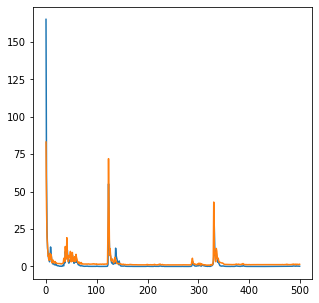

In [67]:
losses = pd.DataFrame(model_history.history)
plt.figure(figsize=(5,5))
plt.plot(losses[['loss','val_loss']])


Text(0.5, 1.0, 'Training Dataset')

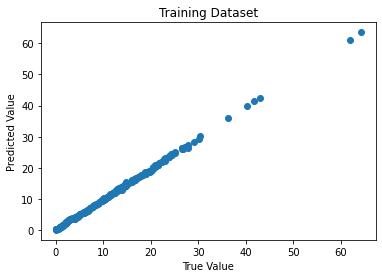

In [68]:
plt.scatter(Y_train,Y_train_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Training Dataset')

Text(0.5, 1.0, 'Test Dataset')

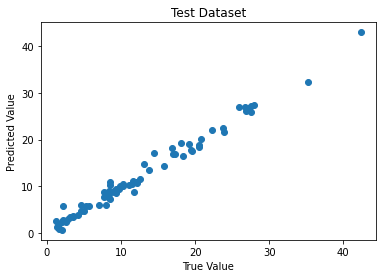

In [69]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Test Dataset')

In [70]:
print('Training Score')
training_score = model.evaluate(X_train,Y_train,verbose=1)


Training Score
10/10 [==============================] - 0s 2ms/step - loss: 0.1316 - mae: 0.2734 - mse: 0.1316


In [71]:
print('Test Score')
test_score = model.evaluate(X_test,Y_test,verbose=1)


Test Score
3/3 [==============================] - 0s 0s/step - loss: 1.4701 - mae: 0.8926 - mse: 1.4701


In [72]:
from sklearn.metrics import r2_score
r2_score_train=r2_score(Y_train,Y_train_pred)
r2_score_test=r2_score(Y_test,Y_test_pred)

In [73]:
print('Training r2 score=',r2_score_train )
print('Test r2 score=',r2_score_test )

Training r2 score= 0.9985418282368742
Test r2 score= 0.9817602079852413
